In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [2]:
from sklearn import set_config
set_config(transform_output='pandas')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
data=pd.read_csv("creditApprovalUCI.csv")
x=data.drop('A16',axis=1)
y=data[['A16']]

In [5]:
x

,A15,A14,A13,A12,A11,A10,A9,A8,A7,A6,A5,A4,A3,A2,A1
0,0,202.0,g,f,1,t,t,1.25,v,w,g,u,0.000,30.83,b
1,560,43.0,g,f,6,t,t,3.04,h,q,g,u,4.460,58.67,a
2,824,280.0,g,f,0,NaN,NaN,NaN,h,q,g,u,NaN,24.50,a
3,3,100.0,g,t,5,t,t,3.75,v,w,g,u,1.540,27.83,b
4,0,120.0,s,f,0,f,t,1.71,v,w,g,u,5.625,20.17,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,0,260.0,g,f,0,f,f,1.25,h,e,p,y,10.085,21.08,b
686,394,200.0,g,t,2,t,f,2.00,v,c,g,u,0.750,22.67,a
687,1,200.0,g,t,1,t,f,2.00,ff,ff,p,y,13.500,25.25,a
688,750,280.0,g,f,0,f,f,0.04,v,aa,g,u,0.205,17.92,b


In [6]:
y

,A16
0,1
1,1
2,1
3,1
4,1
...,...
685,0
686,0
687,0
688,0


In [7]:
x.shape
y.shape

(690, 15)

(690, 1)

In [8]:
data.dtypes

A15      int64
A14    float64
A13     object
A12     object
A11      int64
A10     object
A9      object
A8     float64
A7      object
A6      object
A5      object
A4      object
A3     float64
A2     float64
A1      object
A16      int64
dtype: object

In [9]:
categoric_variables=data.select_dtypes(exclude=[np.float64,np.int64]).columns
categoric_variables

Index(['A13', 'A12', 'A10', 'A9', 'A7', 'A6', 'A5', 'A4', 'A1'], dtype='object')

In [10]:
from sklearn.preprocessing import TargetEncoder

encoder=TargetEncoder(target_type='binary')
encoder.fit(x[categoric_variables],y.to_numpy().flatten())

x_enc=encoder.transform(x[categoric_variables])
data[categoric_variables]=x_enc

x=data.drop('A16',axis=1)

TargetEncoder(target_type='binary')

In [11]:
x

,A15,A14,A13,A12,A11,A10,A9,A8,A7,A6,A5,A4,A3,A2,A1
0,0,202.0,0.459177,0.430520,1,0.726746,0.794791,1.25,0.423612,0.514525,0.493162,0.493162,0.000,30.83,0.440181
1,560,43.0,0.459177,0.430520,6,0.726746,0.794791,3.04,0.629175,0.651420,0.493162,0.493162,4.460,58.67,0.466563
2,824,280.0,0.459177,0.430520,0,0.381097,0.381097,NaN,0.629175,0.651420,0.493162,0.493162,NaN,24.50,0.466563
3,3,100.0,0.459177,0.461971,5,0.726746,0.794791,3.75,0.423612,0.514525,0.493162,0.493162,1.540,27.83,0.440181
4,0,120.0,0.265628,0.430520,0,0.249701,0.794791,1.71,0.423612,0.514525,0.493162,0.493162,5.625,20.17,0.440181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,0,260.0,0.459177,0.430520,0,0.249701,0.081085,1.25,0.629175,0.555584,0.276908,0.276908,10.085,21.08,0.440181
686,394,200.0,0.459177,0.461971,2,0.726746,0.081085,2.00,0.423612,0.452499,0.493162,0.493162,0.750,22.67,0.466563
687,1,200.0,0.459177,0.461971,1,0.726746,0.081085,2.00,0.142939,0.134792,0.276908,0.276908,13.500,25.25,0.466563
688,750,280.0,0.459177,0.430520,0,0.249701,0.081085,0.04,0.423612,0.353417,0.493162,0.493162,0.205,17.92,0.440181


In [12]:
x.isna().sum()
x.dtypes

A15     0
A14    13
A13     0
A12     0
A11     0
A10     0
A9      0
A8     92
A7      0
A6      0
A5      0
A4      0
A3     92
A2     12
A1      0
dtype: int64

A15      int64
A14    float64
A13    float64
A12    float64
A11      int64
A10    float64
A9     float64
A8     float64
A7     float64
A6     float64
A5     float64
A4     float64
A3     float64
A2     float64
A1     float64
dtype: object

In [13]:
num_variables=x.select_dtypes(include=[np.float64,np.int64]).columns
num_variables

from sklearn.impute import SimpleImputer

imputer=SimpleImputer(strategy='median')
imputer.fit(x[num_variables])

Index(['A15', 'A14', 'A13', 'A12', 'A11', 'A10', 'A9', 'A8', 'A7', 'A6', 'A5',
       'A4', 'A3', 'A2', 'A1'],
      dtype='object')

SimpleImputer(strategy='median')

In [14]:
x[num_variables]=imputer.transform(x[num_variables])

x
x.isna().sum()

,A15,A14,A13,A12,A11,A10,A9,A8,A7,A6,A5,A4,A3,A2,A1
0,0.0,202.0,0.459177,0.430520,1.0,0.726746,0.794791,1.25,0.423612,0.514525,0.493162,0.493162,0.000,30.83,0.440181
1,560.0,43.0,0.459177,0.430520,6.0,0.726746,0.794791,3.04,0.629175,0.651420,0.493162,0.493162,4.460,58.67,0.466563
2,824.0,280.0,0.459177,0.430520,0.0,0.381097,0.381097,1.00,0.629175,0.651420,0.493162,0.493162,2.540,24.50,0.466563
3,3.0,100.0,0.459177,0.461971,5.0,0.726746,0.794791,3.75,0.423612,0.514525,0.493162,0.493162,1.540,27.83,0.440181
4,0.0,120.0,0.265628,0.430520,0.0,0.249701,0.794791,1.71,0.423612,0.514525,0.493162,0.493162,5.625,20.17,0.440181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,0.0,260.0,0.459177,0.430520,0.0,0.249701,0.081085,1.25,0.629175,0.555584,0.276908,0.276908,10.085,21.08,0.440181
686,394.0,200.0,0.459177,0.461971,2.0,0.726746,0.081085,2.00,0.423612,0.452499,0.493162,0.493162,0.750,22.67,0.466563
687,1.0,200.0,0.459177,0.461971,1.0,0.726746,0.081085,2.00,0.142939,0.134792,0.276908,0.276908,13.500,25.25,0.466563
688,750.0,280.0,0.459177,0.430520,0.0,0.249701,0.081085,0.04,0.423612,0.353417,0.493162,0.493162,0.205,17.92,0.440181


A15    0
A14    0
A13    0
A12    0
A11    0
A10    0
A9     0
A8     0
A7     0
A6     0
A5     0
A4     0
A3     0
A2     0
A1     0
dtype: int64

## Polynomial Features

$$cost(x)=100-2x-50x^2+45.4x^3$$

Text(0.5, 1.0, 'Cost and Request')

Text(0.5, 0, 'Request')

Text(0.5, 0, 'Cost')

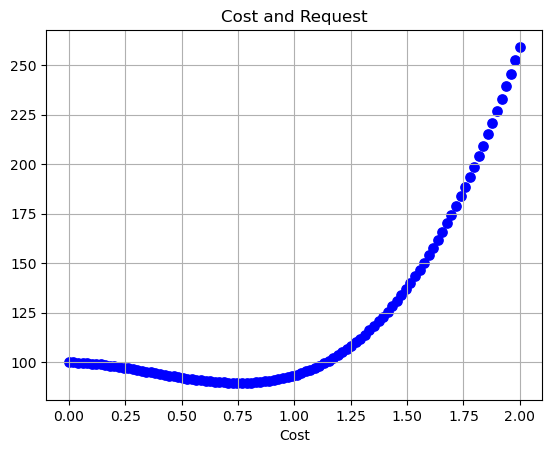

In [15]:
request=np.linspace(0,2,100)
cost=100-2*request-50*np.power(request,2)+45.4*np.power(request,3)
df=pd.DataFrame({'request':request,'cost':cost})

plt.scatter(df.request,df.cost,s=45,c='blue')
plt.title('Cost and Request')
plt.xlabel('Request')
plt.xlabel('Cost')
plt.grid(True)

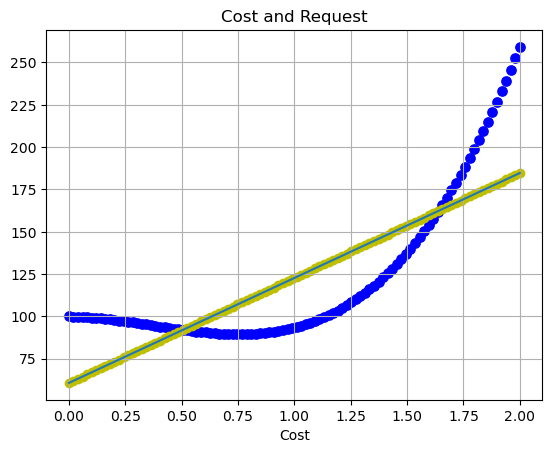

In [16]:
x_2=df[['request']]
y_2=df[['cost']]

from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(x_2,y_2)

plt.scatter(df.request,df.cost,s=45,c='blue')
plt.title('Cost and Request')
plt.xlabel('Request')
plt.xlabel('Cost')
plt.grid(True)
plt.plot(x_2,model.predict(x_2))
plt.scatter(x_2,model.predict(x_2),c='y');

In [17]:
model.intercept_  
model.coef_

array([60.72720743])

array([[61.98659729]])

$$f(x)=60.72+61.98x$$

In [18]:
x_2

,request
0,0.000000
1,0.020202
2,0.040404
3,0.060606
4,0.080808
...,...
95,1.919192
96,1.939394
97,1.959596
98,1.979798


In [19]:
from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(degree=3,include_bias=False)
X_poly=poly.fit_transform(x_2)

X_poly

,request,request^2,request^3
0,0.000000,0.000000,0.000000
1,0.020202,0.000408,0.000008
2,0.040404,0.001632,0.000066
3,0.060606,0.003673,0.000223
4,0.080808,0.006530,0.000528
...,...,...,...
95,1.919192,3.683298,7.068955
96,1.939394,3.761249,7.294543
97,1.959596,3.840016,7.524880
98,1.979798,3.919600,7.760016


In [20]:
model2=LinearRegression()
model2.fit(X_poly,y_2)

LinearRegression()

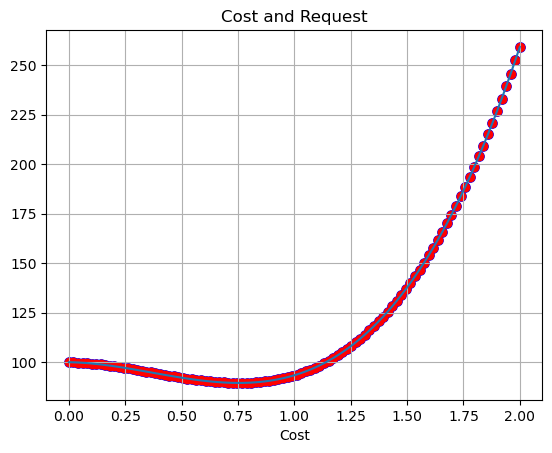

In [21]:
plt.scatter(df.request,df.cost,s=45,c='blue')
plt.title('Cost and Request')
plt.xlabel('Request')
plt.xlabel('Cost')
plt.grid(True)
plt.plot(x_2,model2.predict(X_poly))
plt.scatter(x_2,model2.predict(X_poly),c='r');

In [22]:
model2.coef_
model2.intercept_

array([[ -2. , -50. ,  45.4]])

array([100.])

### Decision Tree Features

In [23]:
#example for zip
t=[1,2,3,4,5]
kk=zip(t[::2],t[1::2])
list(kk)
type(kk)

[(1, 2), (3, 4)]

zip

In [24]:
categoric_variables

Index(['A13', 'A12', 'A10', 'A9', 'A7', 'A6', 'A5', 'A4', 'A1'], dtype='object')

In [25]:
#example
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
X_train[list(list(zip(categoric_variables[::2],categoric_variables[1::2]))[1])]

,A10,A9
596,0.726746,0.794791
303,0.249701,0.081085
204,0.726746,0.794791
351,0.249701,0.081085
118,0.726746,0.794791
...,...,...
359,0.249701,0.081085
192,0.249701,0.794791
629,0.249701,0.081085
559,0.726746,0.794791


In [26]:
list(zip(categoric_variables[::2],categoric_variables[1::2]))

[('A13', 'A12'), ('A10', 'A9'), ('A7', 'A6'), ('A5', 'A4')]

In [27]:
a=list(zip(categoric_variables[::2],categoric_variables[1::2]))[1]
type(a)

tuple

In [28]:
#Before extraction
from sklearn.linear_model import LogisticRegressionCV

model=LogisticRegressionCV(random_state=0)

model.fit(X_train,y_train)

model.score(X_train,y_train)

D:\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown

LogisticRegressionCV(random_state=0)

0.865424430641822

In [29]:
from sklearn.tree import DecisionTreeClassifier

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

for i,basement in enumerate(list(zip(categoric_variables[::2],categoric_variables[1::2]))):
    i
    basement
    extractor=DecisionTreeClassifier(max_depth=2,random_state=0)
    extractor.fit(X_train[list(basement)],y_train)
    
    new=extractor.predict_proba(X_train[list(basement)])
    X_train.insert(loc=i,column='dtc classifier'+str(i),value=new[:,1])

0

('A13', 'A12')

DecisionTreeClassifier(max_depth=2, random_state=0)

1

('A10', 'A9')

DecisionTreeClassifier(max_depth=2, random_state=0)

2

('A7', 'A6')

DecisionTreeClassifier(max_depth=2, random_state=0)

3

('A5', 'A4')

DecisionTreeClassifier(max_depth=2, random_state=0)

In [30]:
X_train.head()

,dtc classifier0,dtc classifier1,dtc classifier2,dtc classifier3,A15,A14,A13,A12,A11,A10,A9,A8,A7,A6,A5,A4,A3,A2,A1
596,0.464853,0.909722,0.466960,0.512397,4159.0,396.0,0.459177,0.461971,8.0,0.726746,0.794791,2.375,0.423612,0.452499,0.493162,0.493162,3.000,46.08,0.466563
303,0.464853,0.082902,0.466960,0.512397,0.0,120.0,0.459177,0.430520,0.0,0.249701,0.081085,0.085,0.423612,0.651420,0.493162,0.493162,2.875,15.92,0.466563
204,0.464853,0.909722,0.466960,0.226087,1187.0,50.0,0.459177,0.430520,1.0,0.726746,0.794791,0.085,0.423612,0.514525,0.276908,0.276908,2.125,36.33,0.440181
351,0.464853,0.082902,0.135593,0.226087,0.0,100.0,0.459177,0.430520,0.0,0.249701,0.081085,0.000,0.142939,0.134792,0.276908,0.276908,0.585,22.17,0.440181
118,0.464853,0.909722,0.466960,0.512397,1332.0,360.0,0.459177,0.461971,6.0,0.726746,0.794791,14.000,0.423612,0.421657,0.493162,0.493162,7.040,57.83,0.440181


In [31]:
#After extraction
from sklearn.linear_model import LogisticRegressionCV

model=LogisticRegressionCV(random_state=0,solver='newton-cg',cv=20)

model.fit(X_train,y_train.to_numpy().ravel())

model.score(X_train,y_train)

LogisticRegressionCV(cv=20, random_state=0, solver='newton-cg')

0.8840579710144928

### Dimension Reducing

In [70]:
from sklearn.random_projection import GaussianRandomProjection
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [71]:
from sklearn.datasets import load_digits

digits=load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [72]:
x=digits.data
y=digits.target
x
y

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

array([0, 1, 2, ..., 8, 9, 8])

In [73]:
x.shape

(1797, 64)

### PCA

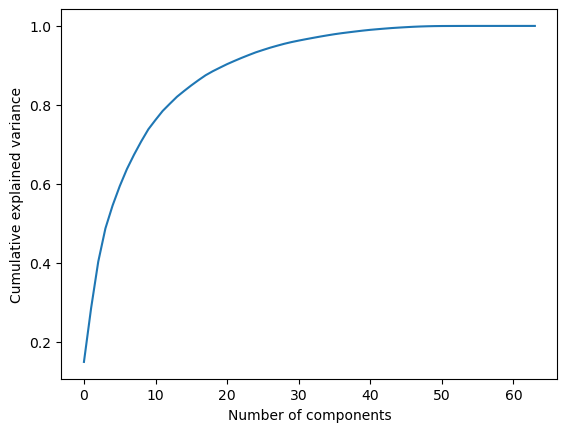

In [74]:
pca=PCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show();

In [75]:
np.cumsum(pca.explained_variance_ratio_)

array([0.14890594, 0.28509365, 0.40303959, 0.48713938, 0.54496353,
       0.59413263, 0.6372925 , 0.67390623, 0.70743871, 0.73822677,
       0.76195018, 0.78467714, 0.80289578, 0.82063433, 0.83530534,
       0.84940249, 0.86258838, 0.87506976, 0.88524694, 0.89430312,
       0.9031985 , 0.91116973, 0.91884467, 0.9260737 , 0.93303259,
       0.9389934 , 0.94474955, 0.94990113, 0.95479652, 0.9590854 ,
       0.96282146, 0.96635421, 0.96972105, 0.97300135, 0.97608455,
       0.97902234, 0.98158823, 0.98386565, 0.98608843, 0.98820273,
       0.99010182, 0.99168835, 0.99319995, 0.99460574, 0.99577196,
       0.99684689, 0.99781094, 0.99858557, 0.99914278, 0.99954711,
       0.99975703, 0.99983951, 0.99989203, 0.99994255, 0.99997555,
       0.99998798, 0.99999503, 0.99999804, 0.99999911, 0.99999966,
       1.        , 1.        , 1.        , 1.        ])

In [76]:
x.shape

(1797, 64)

In [77]:
pca=PCA(n_components=2).fit(x)
x_pca=pca.transform(x)
x_pca

,pca0,pca1
0,-1.259466,21.274883
1,7.957611,-20.768699
2,6.991923,-9.955986
3,-15.906105,3.332464
4,23.306867,4.269060
...,...,...
1792,-14.606628,13.344123
1793,6.464574,20.567298
1794,10.801284,-6.960253
1795,-4.872101,12.423955


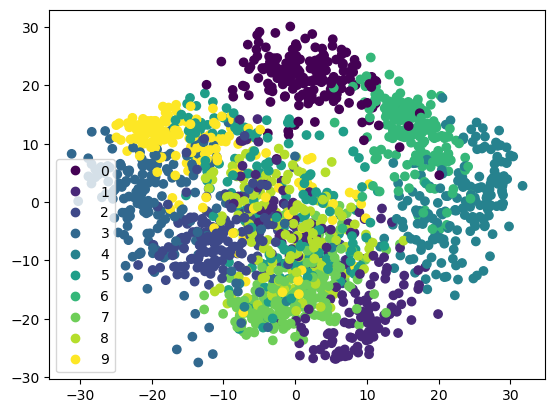

In [78]:
sc=plt.scatter(x=x_pca.iloc[:,0],y=x_pca.iloc[:,1],c=y)
plt.legend(handles=sc.legend_elements()[0],labels=list(range(10)));

### LDA

In [79]:
lda=LinearDiscriminantAnalysis(n_components=2)
x_lda=lda.fit_transform(x,y)
x_lda

,lineardiscriminantanalysis0,lineardiscriminantanalysis1
0,2.014632,5.623486
1,-0.220967,-3.592400
2,-2.234855,-2.709504
3,-2.760965,0.624427
4,5.845449,-1.754015
...,...,...
1792,-1.213858,2.473313
1793,2.456013,4.420402
1794,1.046972,-1.483677
1795,-0.407873,1.991673


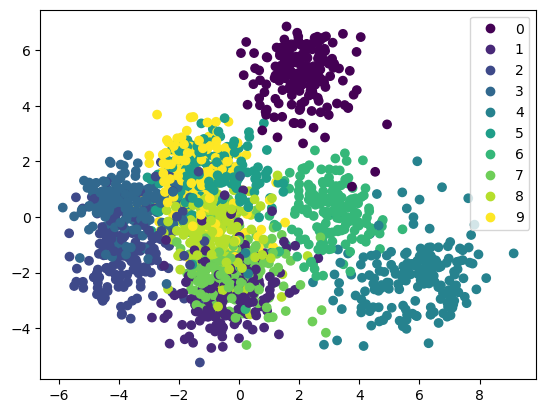

In [80]:
sc=plt.scatter(x=x_lda.iloc[:,0],y=x_lda.iloc[:,1],c=y)
plt.legend(handles=sc.legend_elements()[0],labels=list(range(10)));

### UMAP

In [81]:
import umap 
import umap.plot

D:\anaconda3\Lib\site-packages\umap\plot.py:203: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(nopython=False)


<Axes: >

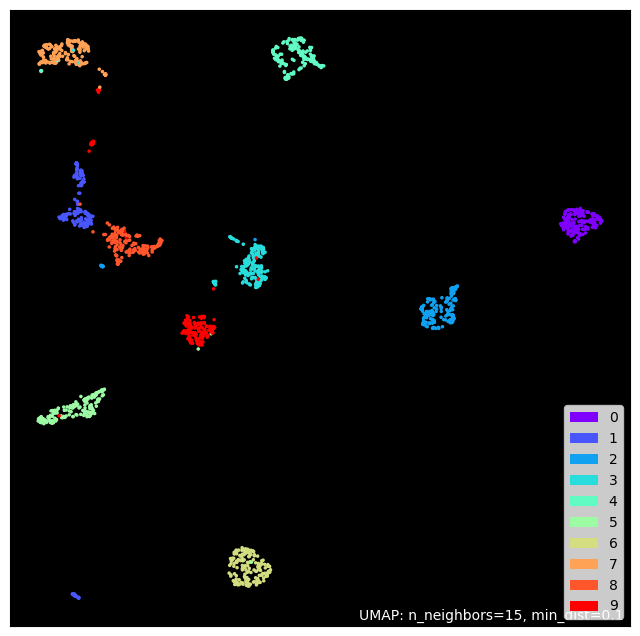

In [85]:
mapper=umap.UMAP().fit(digits.data)
x_umap=mapper.transform(x)

umap.plot.points(mapper,labels=digits.target,theme='fire')